## Assignments

To close out this checkpoint, you're going to do three assignments. For the first assignment, you'll write up a short answer to a question.  For the second two assignments, you'll do your work in Jupyter notebooks.


Please submit links to all your work below. This is not a graded checkpoint, but you should discuss your solutions with your mentor. Also, when you're done, compare your work to [these example solutions](https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/4.solution_understanding_the_relationship.ipynb).

### 1. Interpretation and significance

Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

*expenditure* is the annual spending on recreation in US dollars, *annual_income* is the annual income in US dollars, and *have_kids* is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

Before answering what stats I'd like to see, I'd like to see the data and how it was handled to determine if the model was valid.

First off, I would want to see t stats/p-values to determine if groups were statistically significant. <br>
Since we see a decrease in expenditure in families with kids and increase in income, we could propose the relationship is quadratic. In this case, it might be worth transforming the data in a way (perhaps log) to gain more insights into these relationships. 

### 2. Weather model

In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables? 
* Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for *humidity* and *windspeed* change? Interpret the estimated coefficients.

In [20]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']
# X is the feature set
X = weather_df[['humidity','windspeed']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:54:37   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- All of the coefficients are statistically significant. Their p-values are almost 0.
- Given what is general knowledge about humidity, the heat index (or difference in temp and apparent temp) should increase as humidity increases. However, we see a negative correlation in this model. Windspeed coef could be predicting based on general assumptions of weather, with some outliers of course.
- The model suggests that for every point that humidity decreases by 3.0292, the target increases by 1. Also, for every point that windspeed decreases by 0.1193, the target increases by 1.

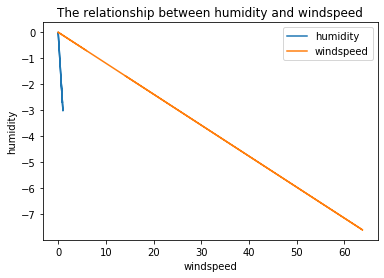

In [6]:
humidity = weather_df.humidity * -3.0292
windspeed = weather_df.windspeed * -0.1193


plt.plot(weather_df.humidity, humidity)
plt.plot(weather_df.windspeed, windspeed)
plt.legend(["humidity", "windspeed"])
plt.xlabel("windspeed")
plt.ylabel("humidity")
plt.title("The relationship between humidity and windspeed")

plt.show()

In [5]:
weather_df['humidity_windspeed_interaction'] = weather_df.humidity * weather_df.windspeed

# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']
# X is the feature set
X = weather_df[['humidity','windspeed', 'humidity_windspeed_interaction']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:12:23   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0839      0.033      2.511      0.012       0.018       0.149
humidity                           0.1775      0.043      4.133      0.000       0.093       0.262
windspeed                          0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed_interaction    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- All coefficiencts are statistically significant due to the p-values < 0.05.
- An important note is that humidity and windspeed change from negative to positive values when we incude the interraction term.
- This model suggests that for every point that humidity increases by 0.1775, the target increases by 1; and that for every point that windspeed increases by 0.0905, the target increases by 1.
- The interraction between the coefficent is -0.2971, which suggests the following: 1 point increase in humidity results in 0.1775 - 0.2971 * windspeed point increase in the target. This basically suggests that as humidity increases and if windspeed increases, the temperature will not increase as much as if windspeed were lower.

###  3. House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
* Now, exclude the insignificant features from your model. Did anything change?
* Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
* Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [11]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df_houseprices = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [12]:
num_cols = df_houseprices.select_dtypes(['int64', 'float64']).columns
print(num_cols)

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')


In [13]:
non_numeric_columns = df_houseprices.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
The number of non-numerical columns is 43


In [15]:
total_nulls = df_houseprices.isnull().sum().sort_values(ascending=False)
percent_nulls = (df_houseprices.isnull().sum()/df_houseprices.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_nulls, percent_nulls], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


In [16]:
np.abs(df_houseprices[num_cols].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

In [17]:
df_houseprices = pd.concat([df_houseprices,pd.get_dummies(df_houseprices.mszoning, prefix="mszoning", drop_first=True)], axis=1)
df_houseprices = pd.concat([df_houseprices,pd.get_dummies(df_houseprices.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(df_houseprices.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df_houseprices.street, prefix="street", drop_first=True).columns)

In [18]:
X = df_houseprices[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]
Y = df_houseprices.saleprice

In [21]:
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [2.33265353e+04 4.56343565e+01 1.34501364e+04 1.64082048e+01
 2.83816393e+01 2.50875137e+04 1.34204564e+04 2.85658560e+04
 9.04778936e+03 1.51037622e+02]

Intercept: 
 -117337.72871399307


In [22]:
x = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              3628.
Date:                Wed, 24 Jun 2020   Prob (F-statistic):                        0.00
Time:                        09:27:02   Log-Likelihood:                         -17496.
No. Observations:                1460   AIC:                                  3.501e+04
Df Residuals:                    1450   BIC:                                  3.506e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
overallqual  2.287e+04   1101.586     20.761      0.000    2.07e+04     2.5e+04
grlivarea      45.5731      2.502     18.212      0.000      40.664      50.482
garagecars   1.425e+04   3030.130      4.704      0.000    8308.345    2.02e+04
garagearea     10.7389     10.512      1.022      0.307      -9.881      31.359
totalbsmtsf    28.1893      2.972      9.485      0.000      22.359      34.019
mszoning_FV -1.077e+04   1.27e+04     -0.847      0.397   -3.57e+04    1.42e+04
mszoning_RH -2.405e+04    1.5e+04     -1.606      0.108   -5.34e+04    5320.366
mszoning_RL -8232.1752   1.16e+04     -0.713      0.476   -3.09e+04    1.44e+04
mszoning_RM -2.873e+04   1.17e+04     -2.462      0.014   -5.16e+04   -5837.863
street_Pave -7.613e+04   1.15e+04     -6.642      0.000   -9.86e+04   -5.37e+04
==============================================================================
Omnibus:                      400.598   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35172.115
Skew:                          -0.014   Prob(JB):                         0.00
Kurtosis:                      27.045   Cond. No.                     5.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Statistically significant variables are overallqual, grlivarea, garagecars, totalbsmtsf, mszoning_RM, and street_Pave
- 1 point increase in overallqual = 22870 increase in sale price
- 1 point increase in grlivarea = 45.5731 increase in sale price 
- 1 point increase in garagecars = 14250 increase in sale price
- 1 point increase in totalbsmtsf = 28.1893 increase in sale price
- 1 point increase in mszoning_RM = 28730 decrease in sale price
- 1 point increase in street_Pave = 76130 decrease in sale price
- It appears overallqual, mszoning_RM contribute more to an increase in sale price than the other features. 
- Conversely, street_Pave appears to have a significantly negative impact on sale price. This one doesn't appear to make sense considering one would think paved roads would be an improvement compared to gravel or other. Also, paved roads are so common, it could be assumed that most houses would have that standard. Therefore, it might be worth going back in the data to see if any errors can be found/fixed within this column.